In [3]:
import pandas as pd  
import numpy as np  
import pickle
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
%matplotlib inline
size=0.1
file='./csv/營養份數表_all new.csv'

In [2]:
df = pd.read_csv(file)
df.drop(['file'], axis="columns", inplace=True)
df1 = df.head(5)
df1

,rice_num,meat_num,veg_num,oil_num,heat,vegtable,rice,meat,fried meat,meat_total
0,4.0,3.5,1.5,3.0,712.5,0.393413,0.017153,0.358917,0.0,0.538376
1,4.0,3.0,1.5,2.0,629.0,0.267304,0.018920,0.324080,0.0,0.486120
2,5.5,4.5,0.6,3.5,874.4,0.047228,0.122384,0.340319,0.0,0.510478
3,4.5,3.5,1.7,3.5,759.8,0.148725,0.031444,0.318160,0.0,0.477240
4,2.0,2.0,0.6,1.5,429.5,0.045313,0.053156,0.093271,0.0,0.139907


In [7]:
#oil
grade=.0
num=0
#for i in range(1,101):
df = pd.read_csv(file)
X = df[['vegtable','meat','fried meat']]**(1/3)#
y = df['oil_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=75)#,  
#poly=make_pipeline(PolynomialFeatures(52), LinearRegression())#linear_model.Lasso() 
#poly.fit(X,y)
oil = linear_model.ElasticNetCV()#Ridge(alpha=.1)LinearRegression()
oil.fit(X_train,y_train)
pickle.dump(oil, open('oil_REG.sav', 'wb'))
y_pred = oil.predict(X_test)
predictions = oil.predict(X_test)
score = oil.score(X_test, y_test)
'''if score>grade:
    grade=score
    num=i'''
#print('score is: %f\npoly is: %d'%(grade,num))
print('Accuracy: ' + str(score*100) + '%')
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
df1 = df.head(10)
df1

Accuracy: 15.380594501140354%


,Predicted,Actual
46,2.765223,2.0
18,2.266077,1.5
138,2.557637,2.5
75,2.490562,1.5
101,2.726427,1.0
22,2.246915,1.5
149,2.349619,2.2
146,2.535818,2.8
157,2.494668,2.0
49,2.609872,3.0


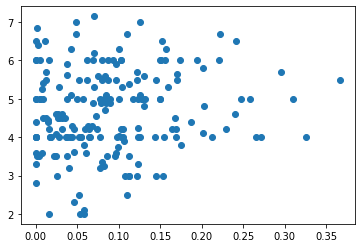

In [4]:
df = pd.read_csv('營養份數表_rice_2.csv')
X = df[['rice']]
y = df['rice_num']
plt.scatter(X,y)
plt.show()

偏度(Skewness): 1.13, 峰度(Kurtosis): 1.38


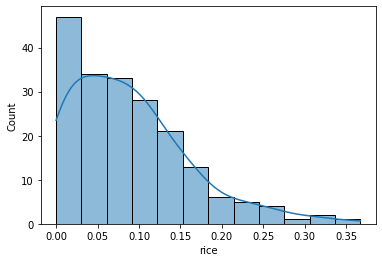

In [5]:
skewness = round(df['rice'].skew(), 2)
kurtosis = round(df['rice'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(df['rice'], kde=True)
plt.show()

偏度(Skewness): rice   -0.13
dtype: float64, 峰度(Kurtosis): rice   -0.3
dtype: float64


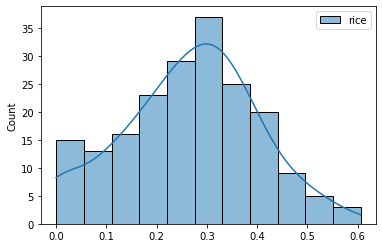

In [6]:
transform_data = df[['rice']]**(1/2)
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

In [7]:
grade=.0
num=0
#for i in range(1,5000):
df = pd.read_csv('營養份數表_rice_2.csv')
X = df[['rice']]**(1/2)
y = df['rice_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1734)#7303
rice = LinearRegression()
rice.fit(X_train,y_train)
pickle.dump(rice, open('rice_REG.sav', 'wb'))
y_pred = rice.predict(X_test)
score = rice.score(X_test, y_test)
'''if score>grade:
    grade=score
    num=i'''
#print('score is: %f\npoly is: %d'%(grade,num))
print('Accuracy: ' + str(score*100) + '%')
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
df1 = df.head(10)
df1

Accuracy: 11.257363234790429%


,Predicted,Actual
120,4.533763,3.5
69,4.738501,6.0
37,4.509742,4.0
104,4.719696,5.0
135,4.764474,4.4
64,4.773542,5.8
15,4.647122,4.0
150,4.774598,4.8
52,4.621695,4.0
14,4.614572,4.6


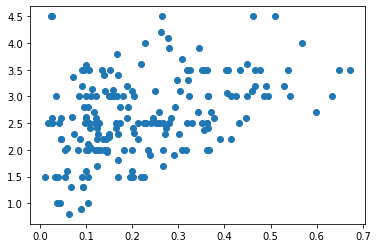

In [8]:
df = pd.read_csv('營養份數表_meat.csv')
X = df[['meat_total']]
y = df['meat_num']
plt.scatter(X,y)
plt.show()

偏度(Skewness): 0.79, 峰度(Kurtosis): -0.01


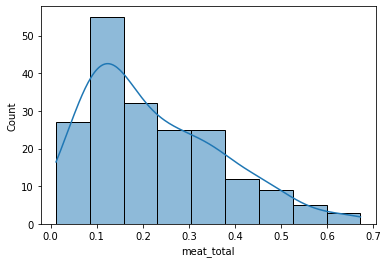

In [9]:
skewness = round(df['meat_total'].skew(), 2)
kurtosis = round(df['meat_total'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(df['meat_total'], kde=True)
plt.show()

偏度(Skewness): meat_total    0.15
dtype: float64, 峰度(Kurtosis): meat_total   -0.67
dtype: float64


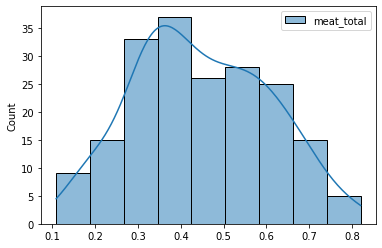

In [10]:
transform_data = df[['meat_total']]**(1/2)
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

In [11]:
#meat
grade=.0
num=0
#for i in range(1,101):
df = pd.read_csv('營養份數表_meat.csv')
X = df[['meat_total']]**(1/2)
y = df['meat_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=50)#50
poly = LinearRegression()
poly.fit(X_train,y_train)
pickle.dump(poly, open('meat_REG.sav', 'wb'))
y_pred = poly.predict(X_test)
predictions = poly.predict(X_test)
score = poly.score(X_test, y_test)
'''if score>grade:
    grade=score
        num=i'''
#print('score is: %f\npoly is: %d'%(grade,num))
print('Accuracy: ' + str(score*100) + '%')
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
df1 = df.head(10)
df1

Accuracy: 45.18592672700127%


,Predicted,Actual
54,2.699516,2.5
39,3.285596,3.5
151,2.457451,2.5
114,2.031425,1.5
76,2.522258,2.0
119,2.474898,2.0
180,2.404159,2.0
155,2.517159,2.2
168,3.008340,3.0
24,2.870235,2.5


In [12]:
load_model=pickle.load(open('meat_REG.sav', 'rb'))
y_pred = load_model.predict(X_test)
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
df1 = df.head(10)
data=pd.DataFrame({'meat_total': [0.191662]})
print(data)
print(load_model.predict(data))
df1

   meat_total
0    0.191662
[2.18033785]


,Predicted,Actual
54,2.699516,2.5
39,3.285596,3.5
151,2.457451,2.5
114,2.031425,1.5
76,2.522258,2.0
119,2.474898,2.0
180,2.404159,2.0
155,2.517159,2.2
168,3.008340,3.0
24,2.870235,2.5


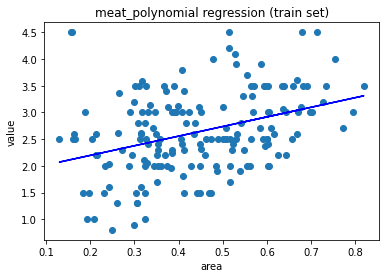

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, poly.predict(X_train), color = 'blue')
plt.title('meat_polynomial regression (train set)')
plt.xlabel("area")
plt.ylabel("value")
plt.show()

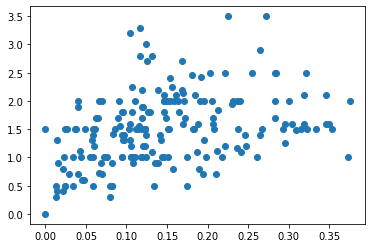

In [14]:
df = pd.read_csv('營養份數表_vegetable.csv')
X = df[['vegtable']]
y = df['veg_num']
plt.scatter(X,y)
plt.show()

偏度(Skewness): 0.59, 峰度(Kurtosis): -0.3


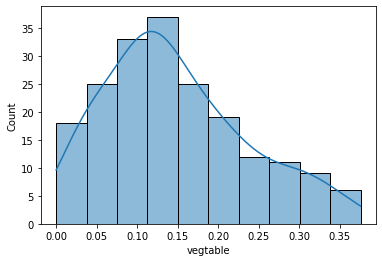

In [15]:
skewness = round(df['vegtable'].skew(), 2)
kurtosis = round(df['vegtable'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(df['vegtable'], kde=True)
plt.show()

偏度(Skewness): vegtable   -0.24
dtype: float64, 峰度(Kurtosis): vegtable   -0.13
dtype: float64


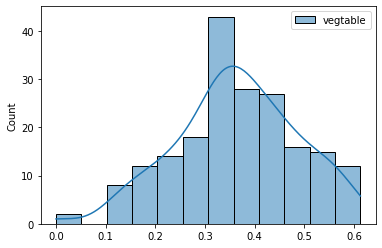

In [16]:
transform_data = df[['vegtable']]**(1/2)
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

In [17]:
grade=.0
num=0
#for i in range(1,101):
df = pd.read_csv('營養份數表_vegetable_2.csv')#移除份數離群值
X = df[['vegtable']]**(1/2)
y = df['veg_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=12)#, 
#veg = make_pipeline(PolynomialFeatures(29), LinearRegression())#Ridge
#veg.fit(X_train, y_train)
veg = LinearRegression()
veg.fit(X_train,y_train)
pickle.dump(veg, open('veg_REG.sav', 'wb'))
y_pred = veg.predict(X_test)
predictions = veg.predict(X_test)
score = veg.score(X_test, y_test)
'''if score>grade:
    grade=score
    num=i'''
#print('score is: %f\npoly is: %d'%(grade,num))
print('Accuracy: ' + str(score*100) + '%')
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
df1 = df.head(10)
df1

Accuracy: 48.49361546152723%


,Predicted,Actual
62,1.387049,1.50
11,1.777895,1.50
173,1.121169,0.70
86,1.438642,1.50
145,1.594724,2.42
94,1.439732,1.50
21,1.367418,1.80
66,1.174198,0.70
23,1.823461,2.50
61,1.625143,1.50


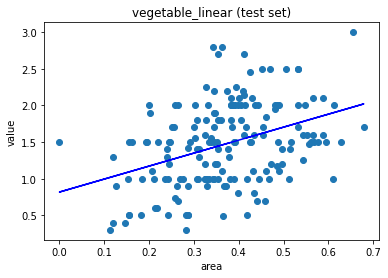

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, veg.predict(X_train), color = 'blue')
plt.title('vegetable_linear (test set)')
plt.xlabel("area")
plt.ylabel("value")
plt.show()

In [8]:
#heat
grade=.0
num=0
#for i in range(1,101):
df = pd.read_csv(file)
X = df[['rice_num','meat_num','veg_num','oil_num']]#**(1/2)#
y = df['heat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=63)#,  
#poly=make_pipeline(PolynomialFeatures(52), LinearRegression())#linear_model.Lasso() 
#poly.fit(X,y)
oil = linear_model.ElasticNetCV()#Ridge(alpha=.1)LinearRegression()
oil.fit(X_train,y_train)
pickle.dump(oil, open('heat_REG.sav', 'wb'))
y_pred = oil.predict(X_test)
predictions = oil.predict(X_test)
score = oil.score(X_test, y_test)
'''if score>grade:
    grade=score
    num=i'''
#print('score is: %f\npoly is: %d'%(grade,num))
print('Accuracy: ' + str(score*100) + '%')
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
df1 = df.head(10)
df1

Accuracy: 96.48270420116769%


,Predicted,Actual
125,647.018591,630.0
153,663.007895,651.8
137,756.400391,717.8
142,716.585565,691.0
111,950.767467,951.6
89,730.330322,733.3
121,1027.415572,1093.6
192,725.099692,709.8
97,659.105442,697.0
103,634.373271,659.3
